# Effects of Ride Characteristics On Ride Count and Duration
## by Christopher James

## Investigation Overview

In this investigation, I examined what variables could have an effect on the duration and number of rides. I focused on the time of day the ride started, whether users were customers or subscribers, and their membership status in a subscriber program with financial restrictions called "bike share for all".

## Dataset Overview

This dataset containes attributes on the 201,458 rides that took place within the month of October, 2018. An extra column detailing what hour the ride started was added for the purpose of aiding the analysis. It includes attribues such as those mentioned above, and also ones like what station the ride started and ended, along with latitude and longitude for each.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201810-fordgobike-tripdata-master.csv', sep = ';')

## Distribution of Rides by Duration

The range of rides by duration go from 60 seconds to over 3000. Plotted on a logarythmic scale, the distribution takes a unimodal shape, showing that most rides last from 300 to 10000 seconds. Outliers were not shown on this chart.

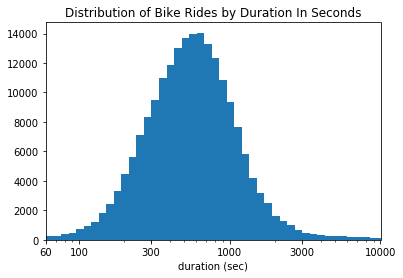

In [3]:
bins = 10 ** np.arange(1.78, 4.93+ 0.2, 0.05)
ticks = [60, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('duration (sec)')
plt.title('Distribution of Bike Rides by Duration In Seconds')
plt.xlim(left = 60, right = 10000);

## Distribution of Rides by Starting Hour

The chart shows a rapid ramp up of the number of rides leading up to a peak at 8:00 AM followed by a regression until another peak at 5:00 PM. The ride numbers slowly decline after that.

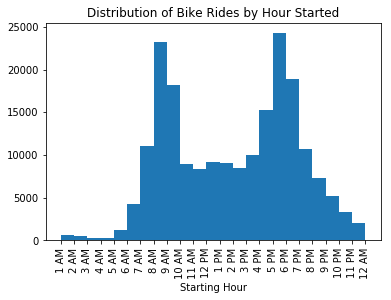

In [4]:
# Display the number of sessions per starting hour
positions = np.arange(1, 25, 1)
labels = ['1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM','8 AM',
          '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM', '4 PM',
          '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM', '12 AM']
bin_size = 1
bin_edges = np.arange(1, 24+1, bin_size)
plt.hist(data = df, x = 'hour_start', bins = bin_edges)
plt.xticks(positions, labels, rotation = 'vertical' )
plt.xlabel('Starting Hour')
plt.title('Distribution of Bike Rides by Hour Started');

## Distribution of Rides by Hour Started and User Type

Here, I found that during the periods of high usage, it is the subscribers, rather than the customers, that are responsible for the lion's share of the growth. The increase in customers does not drop after the first peak and does not begin to until after 6:00 PM.

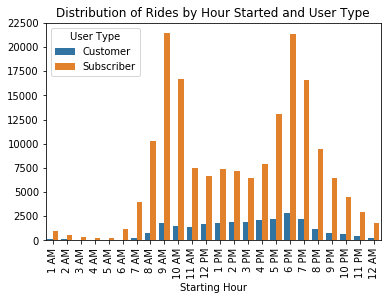

In [5]:
# create a clustered bar chart comparing subscribers to customers by session start hour.
labels = ['1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM','8 AM',
          '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM', '4 PM',
          '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM', '12 AM']
g = sb.countplot(data = df, x = 'hour_start', hue = 'user_type')
g.legend().set_title('User Type')
plt.xlabel('Starting Hour')
plt.xticks(positions - 1, labels, rotation = 'vertical' )
plt.title('Distribution of Rides by Hour Started and User Type')
plt.ylabel('');

## Duration of Bike Rides by  User Type

The median ride duration for customers is almost twice as high as it is for subscribers. The subscriber column has a lower IQR, indicating that there are many more of them.

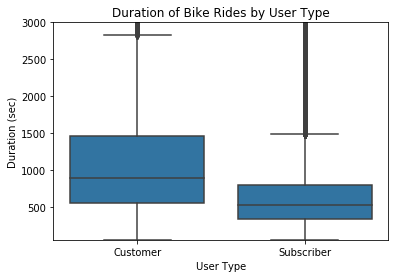

In [6]:
# Create a box chart that displays the data of ride duration of both customers and subscribers. I cropped off the outliers
# to give a better view.
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.title('Duration of Bike Rides by User Type')
plt.ylim(bottom = 60, top = 3000);

## Duration of Bike Rides by Bike Share Status

Here, I made the finding that people on the bike share program have lower average ride durations than people not on it. This is notable because the bike share program offers many benefits, one of which is the first 60 minutes of a ride are free.

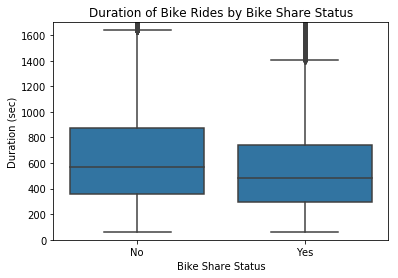

In [7]:
# Create a box chart to display the ride duration for people on the bike share program and those who are not. 
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'bike_share', y = 'duration_sec', color = base_color)
plt.title('Duration of Bike Rides by Bike Share Status')
plt.xlabel('Bike Share Status')
plt.ylabel('Duration (sec)')
plt.ylim(bottom = 0, top = 1700);

## Duration of Rides by User Type and Hour Started

While subscribers make up the lion's share of the growth during busy times as shown before, here We can see that the customers that are there make up a much higher majority of the rides with the longest durations.

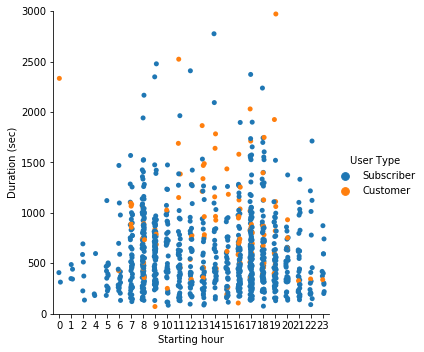

In [11]:
# Create a catplot that displays the duration of each ride broken down by the hour the ride started and further by user type.
samples = np.random.choice(df.shape[0], 1000, replace = False)

df_samp = df.loc[samples,:]
g = sb.catplot(data = df_samp, x = 'hour_start', y = 'duration_sec', hue = 'user_type', legend = True)
g._legend.set_title('User Type')
plt.xlabel('Starting hour')
plt.ylabel('Duration (sec)')
plt.ylim(bottom = 0, top = 3000);